In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/multi_featk_aci.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=67a855f8a154431c30199116024fd694f6f2b4936f698556d56c176ee0e62b31
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm



Using Hyperparameters:
  n_estimators: 128
  max_depth: 30


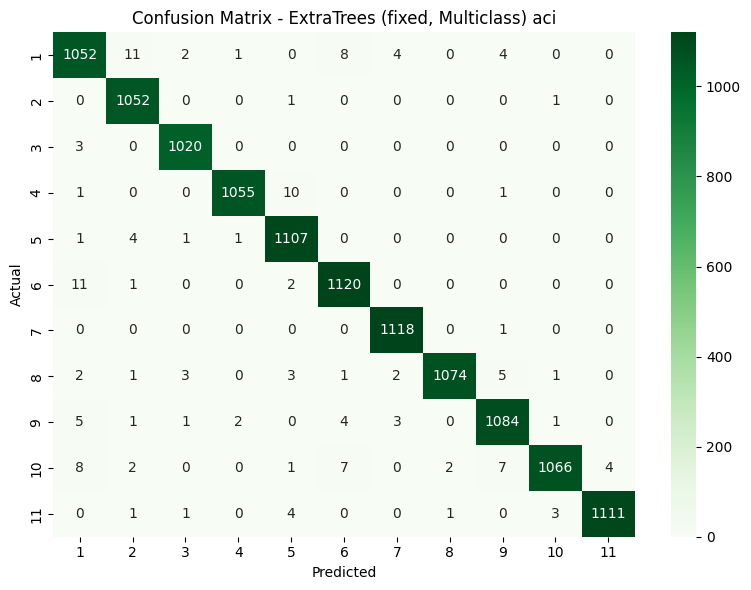

{'Best Params': {'n_estimators': 128, 'max_depth': 30}, 'Accuracy': 0.9879206931022992, 'Precision': 0.9879750134269146, 'Recall': 0.9879206931022992, 'F1 Score': 0.9879168210298307, 'False Positives': 145, 'Execution Time (s)': 11.17}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Encode labels for multiclass
le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = len(le.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Set chosen hyperparameters
n_estimators = 128
max_depth = 30

print("\nUsing Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  max_depth: {max_depth}")

# Start timer for execution time
start_time = time.time()

# Train model
model = ExtraTreesClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# End timer
end_time = time.time()
execution_time = end_time - start_time

# Decode predictions
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred.astype(int))

# Metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Confusion matrix and false positives
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
false_positives = cm.sum(axis=0) - np.diag(cm)
fp_total = false_positives.sum()

# Save results
results["ExtraTrees"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "max_depth": max_depth
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": int(fp_total),
    "Execution Time (s)": round(execution_time, 4)
}

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ExtraTrees (fixed, Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_extratrees_fixed_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["ExtraTrees"])



Using Hyperparameters:
  n_estimators: 75
  max_depth: 20


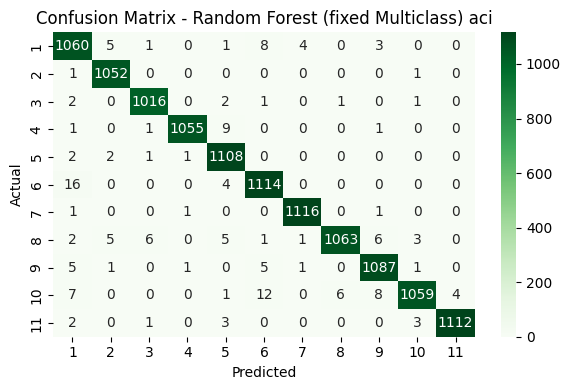

{'Best Params': {'n_estimators': 75, 'max_depth': 20}, 'Accuracy': 0.9865044985004998, 'Precision': 0.9866287143917202, 'Recall': 0.9865487305421431, 'F1 Score': 0.9865455638178399, 'False Positives': 162, 'Execution Time (s)': 23.5181}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
class_labels = np.unique(y_test)

# Set specified hyperparameters
n_estimators = 75
max_depth = 20

print("\nUsing Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  max_depth: {max_depth}")

# Start timer for execution time
start_time = time.time()

# Train model
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict
y_pred_rf = model.predict(X_test)

# End timer
end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

# Confusion matrix & false positives
cm = confusion_matrix(y_test, y_pred_rf, labels=class_labels)
false_positives = cm.sum(axis=0) - np.diag(cm)
fp_total = false_positives.sum()

# Save results
results["RandomForest"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "max_depth": max_depth
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": int(fp_total),
    "Execution Time (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (fixed Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_rf_fixed_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["RandomForest"])


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00



Using Hyperparameters:
  max_depth: 15
  min_samples_split: 2


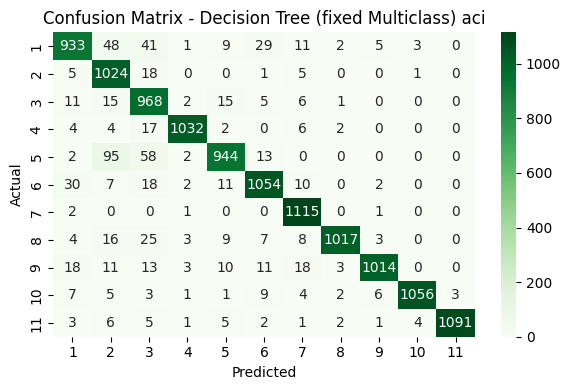

{'Best Params': {'max_depth': 15, 'min_samples_split': 2}, 'Accuracy': 0.9370209930023325, 'Precision': 0.9395468891590194, 'Recall': 0.9371547185704742, 'F1 Score': 0.9369519878065937, 'False Positives': 756, 'Execution Time (s)': 1.6814}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
class_labels = np.unique(y_test)

# Set fixed hyperparameters
max_depth = 15
min_samples_split = 2

print("\nUsing Hyperparameters:")
print(f"  max_depth: {max_depth}")
print(f"  min_samples_split: {min_samples_split}")

# Start timing
start_time = time.time()

# Train model
model = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train, y_train)

# Predict
y_pred_dt = model.predict(X_test)

# Stop timing
end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='macro')
recall = recall_score(y_test, y_pred_dt, average='macro')
f1 = f1_score(y_test, y_pred_dt, average='macro')

# Confusion matrix & false positives
cm = confusion_matrix(y_test, y_pred_dt, labels=class_labels)
false_positives = cm.sum(axis=0) - np.diag(cm)
fp_total = false_positives.sum()

# Save results
results["DecisionTree"] = {
    "Best Params": {
        "max_depth": max_depth,
        "min_samples_split": min_samples_split
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": int(fp_total),
    "Execution Time (s)": round(execution_time, 4)
}

# Confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (fixed Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_dt_fixed_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["DecisionTree"])


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/multi_featk_aci.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score





In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install pyswarm


Using Hyperparameters:
  n_estimators: 200
  max_depth: 10
  learning_rate: 0.2


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


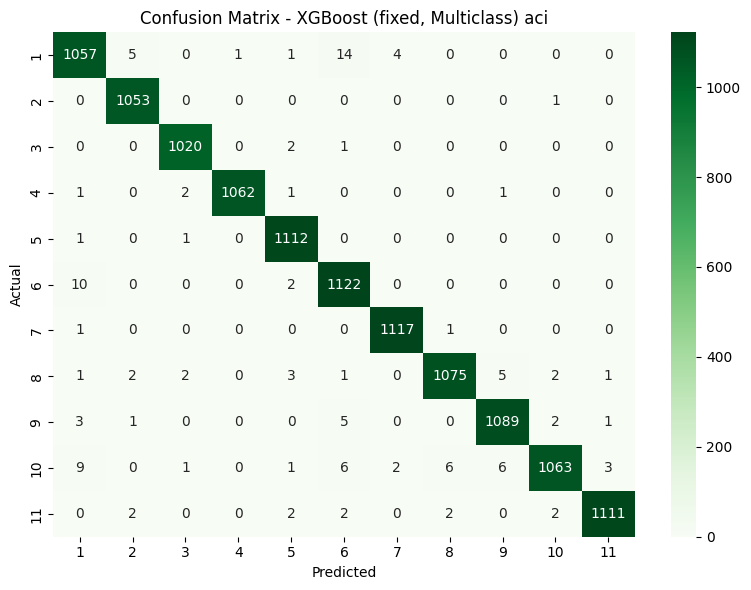

{'Best Params': {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2}, 'Accuracy': 0.9897534155281573, 'Precision': 0.989787858449592, 'Recall': 0.9897534155281573, 'F1 Score': 0.9897456736215379, 'False Positives': 123, 'Execution Time (s)': 53.579}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Encode labels for multiclass
le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = len(le.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Set fixed hyperparameters
n_estimators = 200
max_depth = 10
learning_rate = 0.2

print("\nUsing Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  max_depth: {max_depth}")
print(f"  learning_rate: {learning_rate}")

# Start timing for full execution
start_time = time.time()

# Train model
model = XGBClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate,
    objective='multi:softmax',
    num_class=n_classes,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# End time
end_time = time.time()
execution_time = end_time - start_time  # in seconds

# Decode predictions
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred.astype(int))

# Metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Confusion Matrix and False Positives
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
false_positives = cm.sum(axis=0) - np.diag(cm)
fp_total = false_positives.sum()

# Save results
results["XGBoost"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "learning_rate": learning_rate
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": int(fp_total),
    "Execution Time (s)": round(execution_time, 4)
}

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (fixed, Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_xgboost_fixed_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["XGBoost"])



Using Hyperparameters:
  n_estimators: 135
  num_leaves: 44
  learning_rate: 0.171
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7644
[LightGBM] [Info] Number of data points in the train set: 48012, number of used features: 30
[LightGBM] [Info] Start training from score -2.395773
[LightGBM] [Info] Start training from score -2.389392
[LightGBM] [Info] Start training from score -2.382374
[LightGBM] [Info] Start training from score -2.392350
[LightGBM] [Info] Start training from score -2.403116
[LightGBM] [Info] Start training from score -2.407733
[LightGBM] [Info] Start training from score -2.404268
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.4001

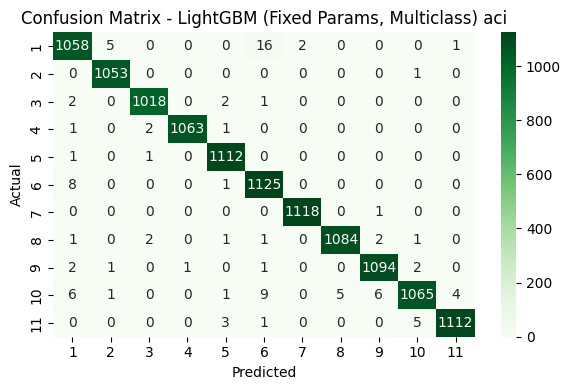

{'Best Params': {'n_estimators': 135, 'num_leaves': 44, 'learning_rate': 0.171}, 'Accuracy': 0.9915028323892036, 'Precision': 0.9915959078235628, 'Recall': 0.9915204821417497, 'F1 Score': 0.9915388314757628, 'False Positives': 102, 'Execution Time (s)': 42.5095}


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(np.unique(y))

# Set fixed hyperparameters
n_estimators = 135
num_leaves = 44
learning_rate = 0.171

print("\nUsing Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  num_leaves: {num_leaves}")
print(f"  learning_rate: {learning_rate}")

# Start timing
start_time = time.time()

# Train final model
model = LGBMClassifier(
    n_estimators=n_estimators,
    num_leaves=num_leaves,
    learning_rate=learning_rate,
    objective='multiclass',
    num_class=num_classes,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict
y_pred_lgbm = model.predict(X_test)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='macro')
recall = recall_score(y_test, y_pred_lgbm, average='macro')
f1 = f1_score(y_test, y_pred_lgbm, average='macro')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
false_positives = cm.sum(axis=0) - np.diag(cm)
fp_total = false_positives.sum()

# Save results
results["LightGBM"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "num_leaves": num_leaves,
        "learning_rate": learning_rate
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": int(fp_total),
    "Execution Time (s)": round(execution_time, 4)
}

# Plot Confusion Matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM (Fixed Params, Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_lightgbm_fixed_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["LightGBM"])


In [ ]:
!pip install catboost


Using Hyperparameters:
  iterations: 200
  depth: 8
  learning_rate: 0.2


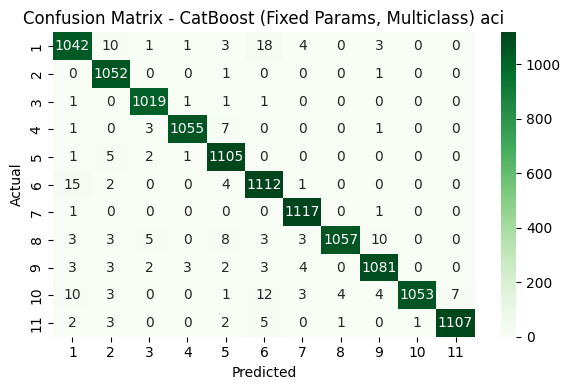

{'Best Params': {'iterations': 200, 'depth': 8, 'learning_rate': 0.2}, 'Accuracy': 0.9830056647784072, 'Precision': 0.9832095438107104, 'Recall': 0.9830814412666024, 'F1 Score': 0.9830579332480308, 'False Positives': 204, 'Execution Time (s)': 132.3396}


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(np.unique(y))

# Set fixed hyperparameters
iterations = 200
depth = 8
learning_rate = 0.2

print("\nUsing Hyperparameters:")
print(f"  iterations: {iterations}")
print(f"  depth: {depth}")
print(f"  learning_rate: {learning_rate}")

# Start timing
start_time = time.time()

# Train final model
model = CatBoostClassifier(
    iterations=iterations,
    depth=depth,
    learning_rate=learning_rate,
    loss_function='MultiClass',
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)

# Predict
y_pred_cat = model.predict(X_test)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_cat)
precision = precision_score(y_test, y_pred_cat, average='macro')
recall = recall_score(y_test, y_pred_cat, average='macro')
f1 = f1_score(y_test, y_pred_cat, average='macro')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cat)
false_positives = cm.sum(axis=0) - np.diag(cm)
fp_total = false_positives.sum()

# Save results
results["CatBoost"] = {
    "Best Params": {
        "iterations": iterations,
        "depth": depth,
        "learning_rate": learning_rate
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": int(fp_total),
    "Execution Time (s)": round(execution_time, 4)
}

# Plot Confusion Matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost (Fixed Params, Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_catboost_fixed_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["CatBoost"])


# **Comparison**

In [ ]:
print(results)

{'ExtraTrees': {'Best Params': {'n_estimators': 128, 'max_depth': 30}, 'Accuracy': 0.9879206931022992, 'Precision': 0.9879750134269146, 'Recall': 0.9879206931022992, 'F1 Score': 0.9879168210298307, 'False Positives': 145, 'Execution Time (s)': 11.17}, 'RandomForest': {'Best Params': {'n_estimators': 75, 'max_depth': 20}, 'Accuracy': 0.9865044985004998, 'Precision': 0.9866287143917202, 'Recall': 0.9865487305421431, 'F1 Score': 0.9865455638178399, 'False Positives': 162, 'Execution Time (s)': 23.5181}, 'DecisionTree': {'Best Params': {'max_depth': 15, 'min_samples_split': 2}, 'Accuracy': 0.9370209930023325, 'Precision': 0.9395468891590194, 'Recall': 0.9371547185704742, 'F1 Score': 0.9369519878065937, 'False Positives': 756, 'Execution Time (s)': 1.6814}, 'XGBoost': {'Best Params': {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2}, 'Accuracy': 0.9897534155281573, 'Precision': 0.989787858449592, 'Recall': 0.9897534155281573, 'F1 Score': 0.9897456736215379, 'False Positives': 123

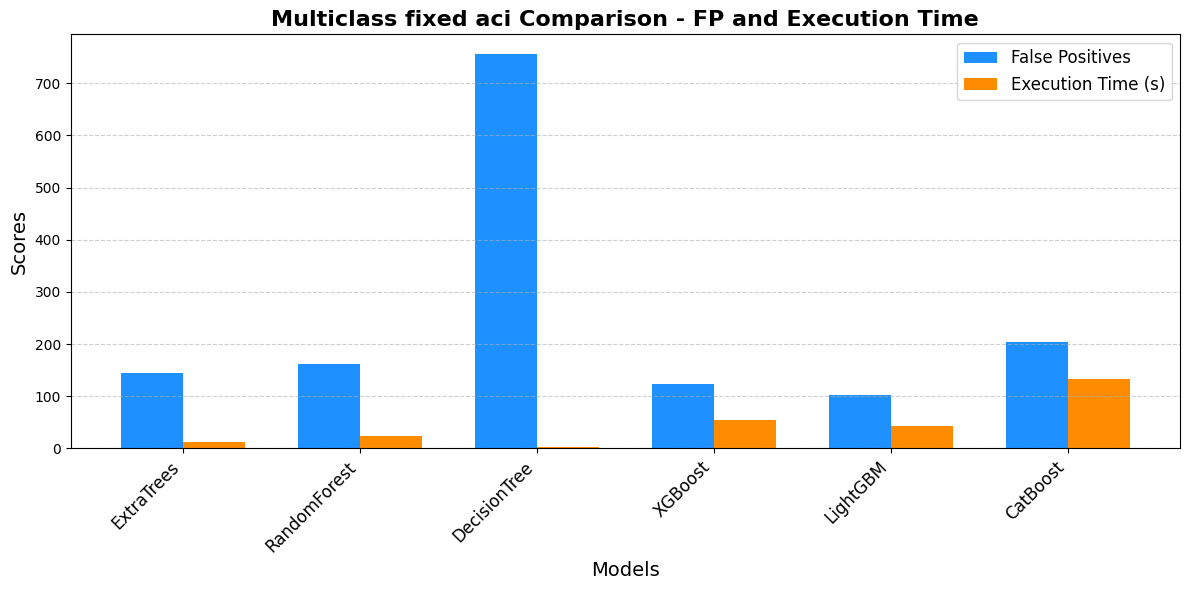

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Extract models and their metrics for FP and Execution Time
models = list(results.keys())
fp = [results[model]["False Positives"] for model in models]
execution_time = [results[model]["Execution Time (s)"] for model in models]


x = np.arange(len(models))
width = 0.35

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, fp, width=width, label='False Positives', color='dodgerblue')  # False Positives in blue
ax.bar(x + width/2, execution_time, width=width, label='Execution Time (s)', color='darkorange')  # Execution time in orange


ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Multiclass fixed aci Comparison - FP and Execution Time', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Save and show the plot
plt.tight_layout()
plt.savefig("multiclass_fixed_aci_fp_time_comparison.png", dpi=1000, bbox_inches='tight')
plt.show()
